<hr style="height:1px; width:100%">

<h1 style="color:#336699">TASK 04P: Working with Pandas DataFrames (Heterogeneous Data))</h1>

<p style="color:#204060; font-size:16px";>
    Created by: &emsp;&emsp;&emsp; Mick Wiedermann<br>
    Student Number: &ensp;2220-58299<br>
    Email Address: &emsp;&ensp; mwiedermann@deakin.edu.au<br><br>
    <i>Computer Science Undergraduate - Data Science Major</i>
</p>

<hr style="height:1px; width:100%">


<p style="color:#336699; font-size:16px";><i>Importing the required modules</i></p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
plt.style.use('seaborn')
import scipy.stats as st
import seaborn as sns
from IPython.display import display, Markdown

<hr style="height:1px; width:100%">

<h2 style="color:#336699"> Task 1: Downloading & Importing the Data</h2>

* Downloading 'nycflights13_weather.csv' which gives hourly meteorological data for three airports in New York: LGA, JFK, and EWR for the whole year of 2013.

Columns are:
* origin – weather station: LGA, JFK, or EWR,
* year, month, day, hour – time of recording,
* temp, dewp – temperature and dewpoint in degrees Fahrenheit,
* humid – relative humidity,
* wind_dir, wind_speed, wind_gust – wind direction (in degrees), speed and gust speed (in mph),
* precip – precipitation, in inches,
* pressure – sea level pressure in millibars,
* visib – visibility in miles,
* time_hour – date and hour (based on the year, month, day, hour fields) formatted as YYYY-mm-dd HH:MM:SS (actually, YYYY-mm-dd HH:00:00). However, due to a bug in the dataset, the data are shifted by 1 hour.

In [2]:
data = pd.read_csv('nycflights13_weather.csv', comment='#')
print(data.shape)
data.head()

(26130, 15)


,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0,2013-01-01 01:00:00
1,EWR,2013,1,1,1,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0,2013-01-01 02:00:00
2,EWR,2013,1,1,2,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0,2013-01-01 03:00:00
3,EWR,2013,1,1,3,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0,2013-01-01 04:00:00
4,EWR,2013,1,1,4,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0,2013-01-01 05:00:00


<hr style="height:1px; width:100%">

<h2 style="color:#336699"> Task 1.1: Converting Imperial Values to Metric</h2>

Converting the following columns so that they use metric (International System of Units, SI) or derived units:
* temp and dewp to Celsius, 
* precip to millimetres, 
* visib to kilometres, as well as 
* wind_speed and wind_gust to km/h.

[Conversion ratios](https://extension.psu.edu/conversion-factors-for-english-and-si-metric-units) used.

In [3]:
df = data
df[['temp', 'dewp']] = ((df.loc[:, ['temp', 'dewp']]-32)*5)/9 # Fahrenheit to Celcius
df['precip'] = df.loc[:, 'precip']*25.4   # Inches to Millimeters 
df[['visib', 'wind_speed', 'wind_gust']] = df.loc[:, ['visib', 'wind_speed', 'wind_gust']]*1.60934 # Miles to KMs

df.head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,0,2.8,-5.6,53.97,230.0,16.667967,19.181163,0.0,1013.9,16.0934,2013-01-01 01:00:00
1,EWR,2013,1,1,1,2.8,-5.6,53.97,230.0,22.223955,25.574883,0.0,1013.0,16.0934,2013-01-01 02:00:00
2,EWR,2013,1,1,2,3.3,-5.6,52.09,230.0,20.371959,23.443643,0.0,1012.6,16.0934,2013-01-01 03:00:00
3,EWR,2013,1,1,3,3.3,-5.0,54.51,230.0,22.223955,25.574883,0.0,1012.7,16.0934,2013-01-01 04:00:00
4,EWR,2013,1,1,4,3.3,-4.4,57.04,240.0,24.075952,27.706124,0.0,1012.8,16.0934,2013-01-01 05:00:00


<hr style="height:1px; width:100%">

<h2 style="color:#336699"> Task 1.2: Converting <i>time_hour</i> to <i>datetime64</i></h2>

Converting the `time_hour` column (in-place) to the `datetime64` type and then subtracting one hour so that the data matches the information stored in the month, day, and hour fields.

In [4]:
df['time_hour'] = pd.to_datetime(df['time_hour'])
df['time_hour'] = df['time_hour'] - pd.Timedelta('1 hour')
df.head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,0,2.8,-5.6,53.97,230.0,16.667967,19.181163,0.0,1013.9,16.0934,2013-01-01 00:00:00
1,EWR,2013,1,1,1,2.8,-5.6,53.97,230.0,22.223955,25.574883,0.0,1013.0,16.0934,2013-01-01 01:00:00
2,EWR,2013,1,1,2,3.3,-5.6,52.09,230.0,20.371959,23.443643,0.0,1012.6,16.0934,2013-01-01 02:00:00
3,EWR,2013,1,1,3,3.3,-5.0,54.51,230.0,22.223955,25.574883,0.0,1012.7,16.0934,2013-01-01 03:00:00
4,EWR,2013,1,1,4,3.3,-4.4,57.04,240.0,24.075952,27.706124,0.0,1012.8,16.0934,2013-01-01 04:00:00


<hr style="height:1px; width:100%">

<h2 style="color:#336699"> Task 1.3: Computing Daily Temperature Means</h2>

Computing daily mean temperatures for the JFK airport with missing hourly temperature measurements ignored (removed) 

(e.g., mean of `[10, NaN, 20]` is simply 15).

In [5]:
# Checking for NaN values 
df.isna().apply([np.sum])

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
sum,0,0,0,0,0,1,1,1,418,3,3,0,2730,0,0


In [6]:
# Locating NaN temperature value. 
loc_nan = np.where(df['temp'].isna())
df.iloc[loc_nan[0]] # Nothing to affect JFK. 

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
5596,EWR,2013,8,22,13,NaN,NaN,NaN,240.0,20.371959,23.443643,0.762,NaN,6.43736,2013-08-22 13:00:00


In [7]:
#jfk = df.query('origin == "JFK"') # Testing alternative method to filter. 
jfk = df.loc[df['origin'] == 'JFK']

# Group by month & day taking the mean hourly temp for each day.
jfk_d_means = jfk.groupby(['month', 'day'])['temp'].mean()  

# Confirming the data set has been reduced to daily entries. 
print(f'Number of Rows/Days: {len(jfk_d_means)}') 
jfk_d_means.head()

Number of Rows/Days: 364


month  day
1      1      3.817391
       2     -1.920833
       3     -1.237500
       4      1.129167
       5      2.720833
Name: temp, dtype: float64

In [8]:
# Calculate mean temp for the year at JFK Airport. 
np.nanmean(jfk_d_means).round(2)

12.46

In [9]:
# Checking if .mean() returns the same as np.nanmean() 
jfk_d_means.mean()

12.455034703568733

<hr style="height:1px; width:100%">

<h2 style="color:#336699"> Task 1.4: Plotting the daily Mean Temperatures</h2>

Presenting the daily mean temperatures on a plot. With the x-axis labels human-readable and intuitive.

In [10]:
jfk_d_means = pd.DataFrame(jfk_d_means)
jfk_d_means.reset_index(inplace=True)
jfk_d_means['year'] = 2013
jfk_d_means['day'] = pd.to_datetime(jfk_d_means[['year', 'month', 'day']])
jfk_d_means.drop(['month', 'year'], axis=1, inplace=True)
jfk_d_means.head()

,day,temp
0,2013-01-01,3.817391
1,2013-01-02,-1.920833
2,2013-01-03,-1.237500
3,2013-01-04,1.129167
4,2013-01-05,2.720833


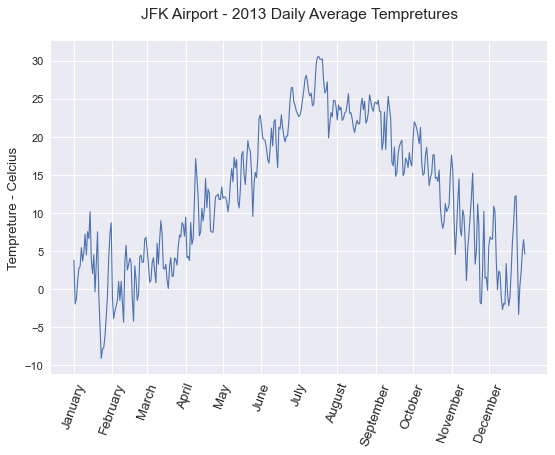

In [11]:
ticks = [0]
months = []

year = pd.date_range('2013', '2014', periods=12)
for month in year:
    months.append(month.month_name())
    if len(ticks) <= 11:
        days = pd.Period(month.month_name()).days_in_month
        ticks.append(ticks[-1] + days)
    
months[-1] = 'December' # Bug fix.

fig, ax = plt.subplots(dpi=80)
ax.plot(jfk_d_means['temp'], linewidth=1)
plt.title('JFK Airport - 2013 Daily Average Tempretures\n', fontsize=14)
plt.ylabel('Tempreture - Celcius', fontsize=12)
plt.xticks(ticks=ticks)
ax.set_xticklabels(months, rotation=70, fontsize=12)

plt.show();

<hr style="height:1px; width:100%">

<h2 style="color:#336699"> Task 1.5: Finding the 5 Hottest Days</h2>

Finding the 5 hottest days. 

In [12]:
jfk_sorted = jfk_d_means.sort_values('temp', ascending=False)
hottest_days = jfk_sorted[0:5]
hottest_days

,day,temp
197,2013-07-17,30.579167
196,2013-07-16,30.483333
200,2013-07-20,30.245833
198,2013-07-18,30.241667
199,2013-07-19,30.187500


In [13]:
# Adding a little style to the output. 
display(Markdown('**The 5 Hottest Days at JFK Airport in 2013**'))

count = 1
for value, temp in zip(hottest_days['day'], hottest_days['temp']):
    display(Markdown(f'{count}. {value.day_name()} {value.month_name()} {(value.day)}'
          + f' with a tempreture of {round(temp, 2)} degrees Celcius'))
    count += 1

**The 5 Hottest Days at JFK Airport in 2013**

1. Wednesday July 17 with a tempreture of 30.58 degrees Celcius

2. Tuesday July 16 with a tempreture of 30.48 degrees Celcius

3. Saturday July 20 with a tempreture of 30.25 degrees Celcius

4. Thursday July 18 with a tempreture of 30.24 degrees Celcius

5. Friday July 19 with a tempreture of 30.19 degrees Celcius

<hr style="height:1px; width:100%">

<h2 style="color:#336699"> Task 2: Additional Tasks for Post Graduates</h2>

1. Computing the daily mean temperatures also for the `EWR` and `LGA` airports.
2. Draw the daily mean temperatures for the 3 airports on the same plot (three curves of different colours).

In [14]:
ewr = df.loc[df['origin'] == 'EWR']

# Group by month & day taking the mean hourly temp.
ewr_d_means = ewr.groupby(['month', 'day'])['temp'].mean() 

# Confirming the data set has been reduced to daily entries. 
print(f'Number of Rows/Days: {len(ewr_d_means)}')

# Reformatting data ready to plot 
ewr_d_means = pd.DataFrame(ewr_d_means)
ewr_d_means.reset_index(inplace=True)
ewr_d_means['year'] = 2013
ewr_d_means['day'] = pd.to_datetime(ewr_d_means[['year', 'month', 'day']])
ewr_d_means.drop(['month', 'year'], axis=1, inplace=True)
ewr_d_means.head()

Number of Rows/Days: 364


,day,temp
0,2013-01-01,3.600000
1,2013-01-02,-1.758333
2,2013-01-03,-1.412500
3,2013-01-04,0.820833
4,2013-01-05,2.629167


In [15]:
lga = df.loc[df['origin'] == 'LGA']

# Group by month & day taking the mean hourly temp.
lga_d_means = lga.groupby(['month', 'day'])['temp'].mean() 

# Confirming the data set has been reduced to daily entries. 
print(f'Number of Rows/Days: {len(lga_d_means)}')

# Reformatting data ready to plot 
lga_d_means = pd.DataFrame(lga_d_means)
lga_d_means.reset_index(inplace=True)
lga_d_means['year'] = 2013
lga_d_means['day'] = pd.to_datetime(lga_d_means[['year', 'month', 'day']])
lga_d_means.drop(['month', 'year'], axis=1, inplace=True)
lga_d_means.head()

Number of Rows/Days: 364


,day,temp
0,2013-01-01,4.021739
1,2013-01-02,-1.820833
2,2013-01-03,-1.275000
3,2013-01-04,1.812500
4,2013-01-05,3.187500


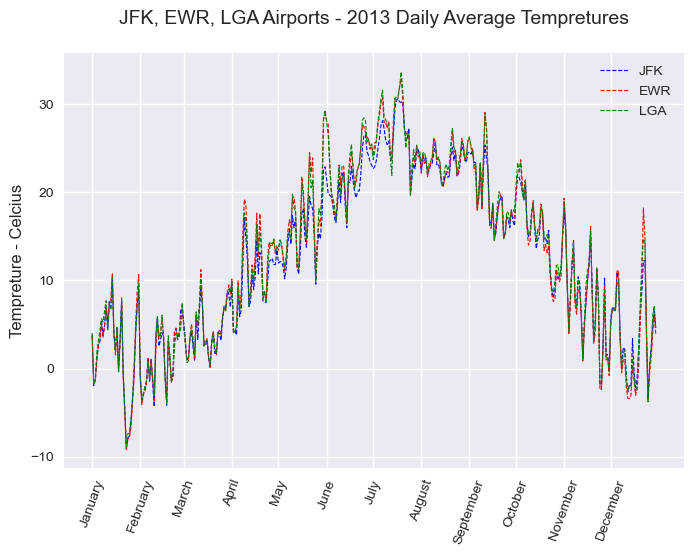

In [16]:
ticks = [0]
months = []

year = pd.date_range('2013', '2014', periods=12)
for month in year:
    months.append(month.month_name())
    if len(ticks) <= 11:
        days = pd.Period(month.month_name()).days_in_month
        ticks.append(ticks[-1] + days)
    
months[-1] = 'December' # Bug fix.

fig, ax = plt.subplots(dpi=100)
ax.plot(jfk_d_means['temp'], 'b--', ewr_d_means['temp'], 'r--', lga_d_means['temp'], 'g--', linewidth=0.8)
plt.title('JFK, EWR, LGA Airports - 2013 Daily Average Tempretures\n', fontsize=14)
plt.ylabel('Tempreture - Celcius', fontsize=12)
plt.xticks(ticks=ticks)
ax.set_xticklabels(months, rotation=70, fontsize=10)
ax.legend( ['JFK', 'EWR', 'LGA'], loc='upper right')

plt.show();

<hr style="height:1px; width:100%">

<h2 style="color:#336699"> Task 3: Optional Features</h2>

1. Marking the days with greater mean temperature than in the preceding day in red and those with smaller – in blue (on the plot).

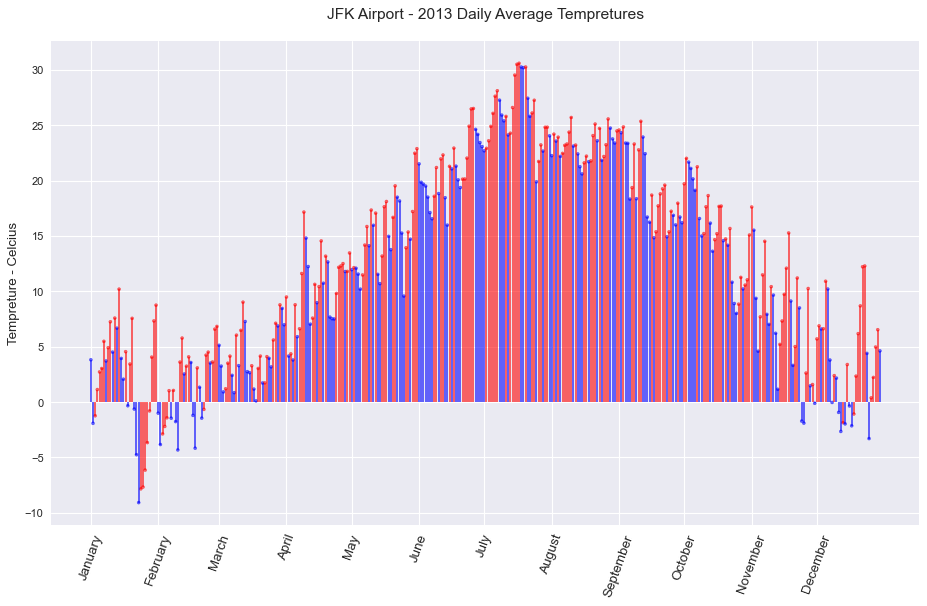

In [17]:
ticks = [0]
months = []

year = pd.date_range('2013', '2014', periods=12)
for month in year:
    months.append(month.month_name())
    if len(ticks) <= 11:
        days = pd.Period(month.month_name()).days_in_month
        ticks.append(ticks[-1] + days)
    
months[-1] = 'December' # Bug fix.

cond_colours = ['b']
for i in range(1, len(jfk_d_means)):
    if jfk_d_means['temp'][i] > jfk_d_means['temp'][i-1]:
        cond_colours.append('r')
    else:
        cond_colours.append('b')

fig, ax = plt.subplots(figsize=(14, 8), dpi=80)
ax.scatter(jfk_d_means.index, jfk_d_means['temp'],  color=cond_colours, alpha=0.6, s=8)
plt.vlines(x=jfk_d_means.index, ymin=0, ymax=jfk_d_means['temp'], color=cond_colours, alpha=0.6)
plt.title('JFK Airport - 2013 Daily Average Tempretures\n', fontsize=14)
plt.ylabel('Tempreture - Celcius', fontsize=12)
plt.xticks(ticks=ticks)
ax.set_xticklabels(months, rotation=70, fontsize=12)

plt.show();

<hr style="height:1px; width:100%">

<h2 style="color:#336699"> Task 3.2:</h2>

For the **JFK airport**, listing all missing temperature readings. This should include not only the temperatures explicitly marked as missing values, but also the records that were completely omitted, for instance `2013-02-21 06:00:00`.

In [18]:
# Checking original data (before conversions) for null values. 
df[df['temp'].isnull()] # Only one.

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
5596,EWR,2013,8,22,13,NaN,NaN,NaN,240.0,20.371959,23.443643,0.762,NaN,6.43736,2013-08-22 13:00:00


Only one `NaN` Temp value for EWR airport which won't affect JFK. Now to locate where each of the omitted hourly entries are, let's first sort the dataframe to help identify what's missing.  

In [19]:
df_sorted = df.sort_values(['origin', 'time_hour'])
df_sorted.head(2) 

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,0,2.8,-5.6,53.97,230.0,16.667967,19.181163,0.0,1013.9,16.0934,2013-01-01 00:00:00
1,EWR,2013,1,1,1,2.8,-5.6,53.97,230.0,22.223955,25.574883,0.0,1013.0,16.0934,2013-01-01 01:00:00


In [20]:
df_sorted_jfk = df_sorted.loc[df_sorted.origin == 'JFK']
df_sorted_jfk.reset_index(drop=True, inplace=True)
df_sorted_jfk

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,JFK,2013,1,1,0,3.3,-5.0,54.51,240.0,25.927948,29.837364,0.0,1014.4,16.0934,2013-01-01 00:00:00
1,JFK,2013,1,1,1,3.3,-4.4,57.04,250.0,27.779944,31.968604,0.0,1013.5,16.0934,2013-01-01 01:00:00
2,JFK,2013,1,1,2,3.9,-3.9,56.77,240.0,31.483937,36.231085,0.0,1013.0,16.0934,2013-01-01 02:00:00
3,JFK,2013,1,1,3,3.9,-3.3,59.37,240.0,29.631941,34.099845,0.0,1013.2,16.0934,2013-01-01 03:00:00
4,JFK,2013,1,1,4,3.9,-3.9,56.77,260.0,24.075952,27.706124,0.0,1013.2,16.0934,2013-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8706,JFK,2013,12,30,19,3.3,-6.1,50.14,330.0,25.927948,29.837364,0.0,1017.4,16.0934,2013-12-30 19:00:00
8707,JFK,2013,12,30,20,2.2,-7.8,47.57,340.0,27.779944,31.968604,0.0,1018.7,16.0934,2013-12-30 20:00:00
8708,JFK,2013,12,30,21,1.1,-8.9,47.25,330.0,31.483937,36.231085,0.0,1019.5,16.0934,2013-12-30 21:00:00
8709,JFK,2013,12,30,22,0.0,-10.6,44.74,320.0,22.223955,25.574883,0.0,1020.1,16.0934,2013-12-30 22:00:00


In [21]:
# Function to test for missing or duplicate hourly values and display their index. 

def test_missing_hours(dataframe):    
    count = 0 
    df = dataframe
    missing = []

    for i in range(len(df)-1):
        
        # if there is a missing value
        if (df.time_hour[i+1] - df.time_hour[i]) >= pd.Timedelta('2 hour'):
            
            # calculate the size of the missing value
            gap = int((df.time_hour[i+1] - df.time_hour[i])/pd.Timedelta(hours=1))
            
            count += gap-1 # 2 hour gap means 1 missing value.
            missing.append(df.index.values[i]) # Add the index of the last correct value. 
            
            # Only print out indexes with gaps larger than 1 missing value. 
            if gap > 2:
                print(f'{gap} hours difference at index: {df.index.values[i]}.')
        
        # Check for duplicate values. 
        elif (df.time_hour[i+1] - df.time_hour[i]) == pd.Timedelta('0 hour'):
            print('~ Duplicate Found',df.index.values[i])
    
    display(Markdown(f'\nCount of missing values: {count}'))
    
    return missing, count

In [22]:
missing, count = test_missing_hours(df_sorted_jfk)

3 hours difference at index: 5606.
6 hours difference at index: 7140.
3 hours difference at index: 7285.
6 hours difference at index: 7324.



Count of missing values: 25

In [23]:
missing_pos = len(missing)
display(Markdown(f'{count} Missing values indentified over {missing_pos} positions. '
                 'Lets visually inspect some of these to confirm the function works correctly.'))
missing[:12]

25 Missing values indentified over 15 positions. Lets visually inspect some of these to confirm the function works correctly.

[4, 1227, 1515, 2133, 2203, 5374, 5445, 5533, 5605, 5606, 7140, 7160]

In [24]:
df_sorted_jfk.iloc[7139:7143] # Visual inspection of idex 7140, 6 hours difference detected. 

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
7139,JFK,2013,10,25,22,10.6,-4.4,34.57,310.0,16.667967,19.181163,0.0,1021.8,16.0934,2013-10-25 22:00:00
7140,JFK,2013,10,25,23,10.0,-3.9,37.36,290.0,14.815970,17.049922,0.0,1022.5,16.0934,2013-10-25 23:00:00
7141,JFK,2013,10,26,5,6.2,1.9,73.94,270.0,14.815970,17.049922,0.0,1023.5,16.0934,2013-10-26 05:00:00
7142,JFK,2013,10,26,6,4.8,1.6,79.75,270.0,11.111978,12.787442,0.0,1023.5,16.0934,2013-10-26 06:00:00


In [25]:
(df_sorted_jfk.time_hour[7141] - df_sorted_jfk.time_hour[7140])/pd.Timedelta(hours=1)

6.0

The test above confirms `test_missing_values` locates and calculates the correct number of missing values. 

<hr style="height:1px; width:100%">

<h2 style="color:#336699"> Task 3.3:</h2>

Adding the missing records to the dataset (just the date-time information, with all the remaining fields being set to `NaN`).

In [26]:
df_copy = df_sorted_jfk # Can use just JFK or entire dataframe.

df_filled = pd.DataFrame(df_sorted_jfk.iloc[0]) # Taking the first line of the sorted dataframe.
df_filled = df_filled.T 
temp_df = df_filled # Creating a temp dataframe to update values and append to the new filled df.

for i in range(len(df_copy)-1):
    
    # If the difference between the 'time_hour' entries is 2 hours, i.e. missing a single value. 
    if (df_copy.time_hour[i+1] - df_copy.time_hour[i]) == pd.Timedelta('2 hour'):
        
        # take the last correct dateTime object and add one hour. 
        date_time = df_copy.iloc[i, -1] + pd.Timedelta('1 hour')
        
        # create the row to be inserted using 'date_time'.
        val_insert = pd.DataFrame([df_copy.iloc[i, 0], df_copy.iloc[i, 1], date_time.month, date_time.day, 
            date_time.hour, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, date_time])
        val_insert = val_insert.T
        # Copy the row to the 'temp_df' which has the correct column names etc. 
        temp_df.iloc[0] = val_insert.iloc[0]
        
        df_filled = df_filled.append(df_copy.iloc[i]) # Append the last correct row.
        df_filled = df_filled.append(temp_df.iloc[0]) # Insert the missing row. 
    
    # If the difference between the 'time_hour' entries is > 2 hours, i.e. missing more than a single value.
    elif (df_copy.time_hour[i+1] - df_copy.time_hour[i]) >= pd.Timedelta('3 hour'):
        
        # Calulate the number of missing entries. 
        gap = int((df_copy.time_hour[i+1] - df_copy.time_hour[i])/pd.Timedelta(hours=1))
        
        df_filled = df_filled.append(df_copy.iloc[i]) # Append the last correct row.
        
        for j in range(gap-1):
            hour = j + 1
            # take the last correct dateTime object and add one hour.
            date_time = df_copy.iloc[i, -1] + pd.Timedelta(str(hour) + ' hour')
            
            # create the row to be inserted using 'date_time'.
            val_insert = pd.DataFrame([df_copy.iloc[i, 0], df_copy.iloc[i, 1], date_time.month, date_time.day, 
                date_time.hour, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, date_time])
            val_insert =val_insert.T
            # Copy the row to the 'temp_df' which has the correct column names etc.
            temp_df.iloc[0] = val_insert.iloc[0]

            df_filled = df_filled.append(temp_df.iloc[0]) # Insert the missing row.
    
    elif i > 0: # No gap, append last checked row. 
        df_filled = df_filled.append(df_copy.iloc[i])

df_filled = df_filled.append(df_copy.iloc[-1]) # Add the final row. 
df_filled.reset_index(drop=True, inplace=True) # Reset the index.
        
df_filled.head(10)

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,JFK,2013,1,1,0,3.3,-5.0,54.51,240.0,25.927948,29.837364,0.0,1014.4,16.0934,2013-01-01 00:00:00
1,JFK,2013,1,1,1,3.3,-4.4,57.04,250.0,27.779944,31.968604,0.0,1013.5,16.0934,2013-01-01 01:00:00
2,JFK,2013,1,1,2,3.9,-3.9,56.77,240.0,31.483937,36.231085,0.0,1013.0,16.0934,2013-01-01 02:00:00
3,JFK,2013,1,1,3,3.9,-3.3,59.37,240.0,29.631941,34.099845,0.0,1013.2,16.0934,2013-01-01 03:00:00
4,JFK,2013,1,1,4,3.9,-3.9,56.77,260.0,24.075952,27.706124,0.0,1013.2,16.0934,2013-01-01 04:00:00
5,JFK,2013,1,1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-01-01 05:00:00
6,JFK,2013,1,1,6,3.9,-3.3,59.37,260.0,20.371959,23.443643,0.0,1012.6,16.0934,2013-01-01 06:00:00
7,JFK,2013,1,1,7,3.9,-3.3,59.37,270.0,18.519963,21.312403,0.0,1012.4,16.0934,2013-01-01 07:00:00
8,JFK,2013,1,1,8,4.4,-2.8,59.5,260.0,24.075952,27.706124,0.0,1012.7,16.0934,2013-01-01 08:00:00
9,JFK,2013,1,1,9,4.4,-2.2,62.21,250.0,27.779944,31.968604,0.0,1012.6,16.0934,2013-01-01 09:00:00


In [27]:
missing2, count2 = test_missing_hours(df_filled) # Re-test for missing values and duplicates. 


Count of missing values: 0

Now to check that the number of missing values identified, is the number of rows added to the dataframe.

In [28]:
display(Markdown(f'Number of rows added: {len(df_filled) - len(df_sorted_jfk)}. '
                 f'Number of values detected missing: {count}.'))

if ((len(df_filled) - len(df_sorted_jfk)) == count):
    display(Markdown(f'Perfect! We now have a row for each hour in the year. '))
else:
    display(Markdown('Hmmm. Something isn\'t quite right.'))

Number of rows added: 25. Number of values detected missing: 25.

Perfect! We now have a row for each hour in the year. 

<hr style="height:1px; width:100%">

<h2 style="color:#336699"> Task 3.4:</h2>

Re-computing the daily average temperatures, this time by linearly interpolating between the preceding and following non-missing data, e.g., a temperature sequence of `[..., 10, NaN, NaN, 40, ...]` should be transformed to `[..., 10, 20, 30, 40, ...]`.

In [29]:
temp_missing = pd.DataFrame(df_filled[['temp', 'month', 'day']])
temp_missing['temp'] = temp_missing.temp.astype('float')
print(f'Annual Temp mean w/missing values: {temp_missing.temp.mean()}')
temp_missing[7151:7158]

Annual Temp mean w/missing values: 12.456572150155049


,temp,month,day
7151,10.0,10,25
7152,NaN,10,26
7153,NaN,10,26
7154,NaN,10,26
7155,NaN,10,26
7156,NaN,10,26
7157,6.2,10,26


In [30]:
temp_interpolated = temp_missing
temp_interpolated['temp'] = temp_missing['temp'].interpolate(method='linear').round(2)
print(f'Annual Temp mean w/missing values: {temp_interpolated.temp.mean()}')
temp_interpolated[7151:7158]

Annual Temp mean w/missing values: 12.456318681318754


,temp,month,day
7151,10.00,10,25
7152,9.37,10,26
7153,8.73,10,26
7154,8.10,10,26
7155,7.47,10,26
7156,6.83,10,26
7157,6.20,10,26


<hr style="height:1px; width:100%">

<h2 style="color:#336699"> Task 3.5:</h2>

Draw a plot of average daily temperatures comparing the missing value omitted vs linearly interpolated cases.

In [31]:
# Group by month & day taking the mean hourly temp for each day.
jfk_temp_missing = temp_missing.groupby(['month', 'day'], as_index=False)['temp'].mean()  
jfk_temp_interp = temp_interpolated.groupby(['month', 'day'], as_index=False)['temp'].mean()  

# Confirming the data set has been reduced to daily entries. 
print(f'Number of Rows/Days jfk_temp_missing: {len(jfk_temp_missing)}') 
print(f'Number of Rows/Days jfk_temp_interp: {len(jfk_temp_interp)}') 
jfk_temp_missing.head()

Number of Rows/Days jfk_temp_missing: 364
Number of Rows/Days jfk_temp_interp: 364


,month,day,temp
0,1,1,3.820833
1,1,2,-1.920833
2,1,3,-1.237500
3,1,4,1.129167
4,1,5,2.720833


In [32]:
# Reformatting data ready to plot 
jfk_temp_missing['year'] = 2013
jfk_temp_missing['day'] = pd.to_datetime(jfk_temp_missing[['year', 'month', 'day']])
jfk_temp_missing.drop(['month', 'year'], axis=1, inplace=True)

jfk_temp_interp['year'] = 2013
jfk_temp_interp['day'] = pd.to_datetime(jfk_temp_interp[['year', 'month', 'day']])
jfk_temp_interp.drop(['month', 'year'], axis=1, inplace=True)
jfk_temp_interp.head()

,day,temp
0,2013-01-01,3.820833
1,2013-01-02,-1.920833
2,2013-01-03,-1.237500
3,2013-01-04,1.129167
4,2013-01-05,2.720833


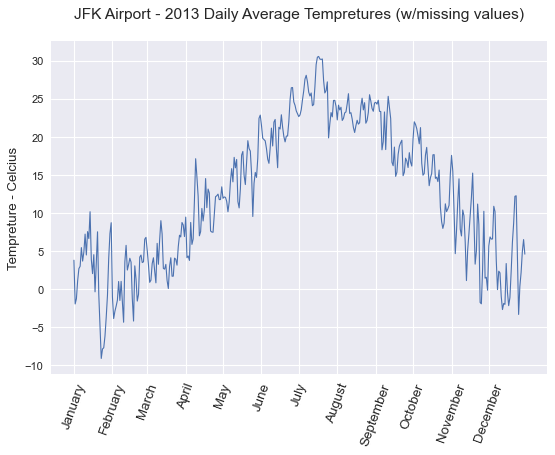

In [33]:
ticks = [0]
months = []

year = pd.date_range('2013', '2014', periods=12)
for month in year:
    months.append(month.month_name())
    if len(ticks) <= 11:
        days = pd.Period(month.month_name()).days_in_month
        ticks.append(ticks[-1] + days)
    
months[-1] = 'December' # Bug fix.

fig, ax = plt.subplots(dpi=80)
ax.plot(jfk_temp_missing['temp'], linewidth=1)
plt.title('JFK Airport - 2013 Daily Average Tempretures (w/missing values)\n', fontsize=14)
plt.ylabel('Tempreture - Celcius', fontsize=12)
plt.xticks(ticks=ticks)
ax.set_xticklabels(months, rotation=70, fontsize=12)

plt.show();

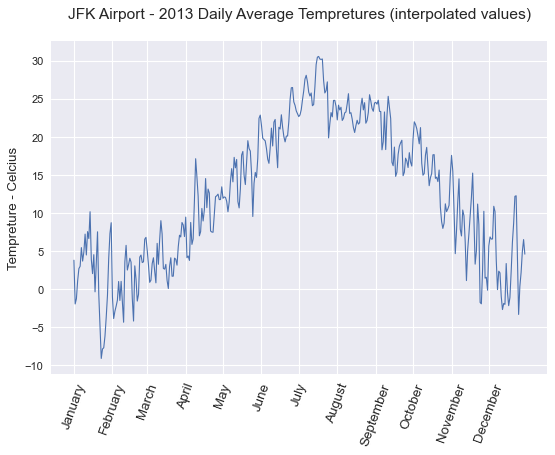

In [34]:
fig, ax = plt.subplots(dpi=80)
ax.plot(jfk_temp_interp['temp'], linewidth=1)
plt.title('JFK Airport - 2013 Daily Average Tempretures (interpolated values)\n', fontsize=14)
plt.ylabel('Tempreture - Celcius', fontsize=12)
plt.xticks(ticks=ticks)
ax.set_xticklabels(months, rotation=70, fontsize=12);

To see a difference in the charts above, I think it would be necassary to plot the hourly values rather than the daily means. 

<hr style="height:1px; width:100%">
<h3> References </h3>

* [Minimalist Data Wrangling with Python](https://datawranglingpy.gagolewski.com/index.html) - Dr habil. Marek Gagolewski. 
* [Pandas Documentation](https://pandas.pydata.org/docs/reference/frame.html) - Various 
* [Matplotlib Documentation](https://matplotlib.org/stable/tutorials/intermediate/tight_layout_guide.html) - Various. 

## Coloured Line chart (Anj)

In [39]:
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

def create_temp_map_withScale(data):
    # Find the temperature shift in the data
    data['new_calc'] = data['temp'].shift(+1)
    data['placeholder'] = 1
    
    #Create a column with a +1 or -1 depending on if the prior value is higher or lower
    data['greater'] = data['placeholder'].where(data['new_calc']<data['temp'], -1)

    data.drop(['placeholder', 'new_calc'], axis=1, inplace = True)
    # Shift values back and add 0 for first value
    data['greater'] = data['greater'].shift(-1)
    data['greater'] = data['greater'].fillna(0)
    
    # Get x axis index 0 - len data
    data['date_num'] = [i for i in range(data['temp'].shape[0])]
    
    # Create a dataset to plot
    data_points = np.array([data['date_num'], data['temp']]).T.reshape(-1,1,2)
    
    # Create the colour segments
    segments = np.concatenate([data_points[0:-1], data_points[1:]], axis =1)
    
    # Set the colour segments to match the 'greater' field for red/blue
    cmap_cols = ListedColormap(['b', 'b',  'r'])
    b_norm = BoundaryNorm([-1, 0, 1], cmap_cols.N)
    lc = LineCollection(segments, cmap=cmap_cols, norm = b_norm)
    
    # Set the line colour rules with the +1 -1 values
    lc.set_array(data['greater'])
    
    #Create the plot
    fig, ax = plt.subplots(figsize = (20,10))
    plt.title('Average Temperature (C) at JFK Airport\n')
    # add the line properties
    line = ax.add_collection(lc)
    lc.set_linewidth(2)
    
    # Set the limits for the x, y axis
    ax.set_xlim(data['date_num'].min(), data['date_num'].max())
    ax.set_ylim(data['temp'].min()-2, data['temp'].max()+2)

    #Create a tick every 14 days
    ax.set_xticks(np.arange(0, data.shape[0], 14))
    #Create a set of indexes for every 14 days
    date_i = [i for i in range(0, data.shape[0],14)]
    # Set the x labels to the date column (every 14 days)
    ax.set_xticklabels(data['day'][date_i], rotation=50)
    
    ax.set_ylabel(('Celsius'))
    
    plt.show()

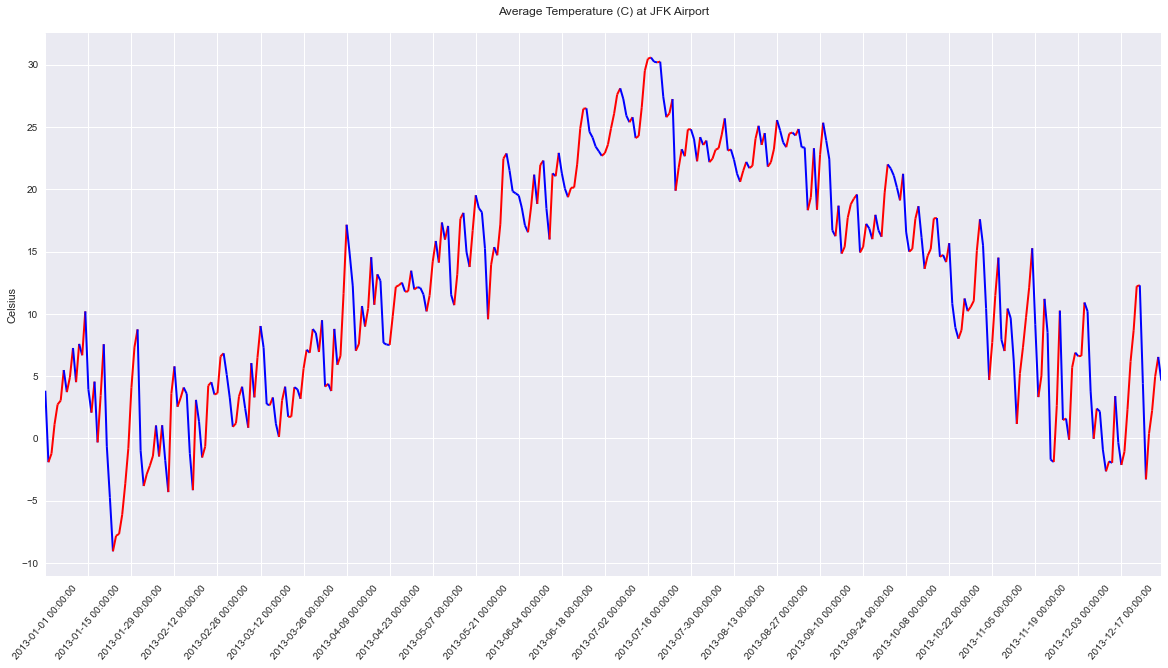

In [40]:
create_temp_map_withScale(jfk_temp_interp)